___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [34]:
from datetime import datetime

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
df.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

### 3.Check missing values and if there are any dublicate rows or not.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [10]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [13]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

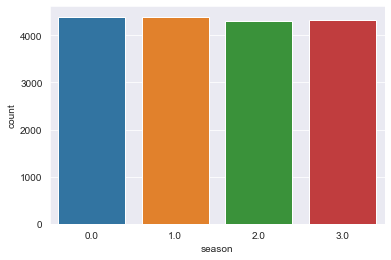

In [12]:
# season
sns.countplot(data=df,x="season");

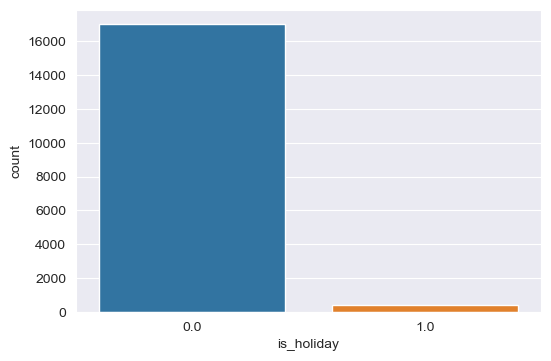

In [18]:
# is_holiday
plt.figure(dpi=100)
sns.countplot(data=df, x="is_holiday");

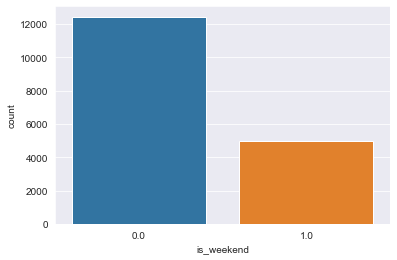

In [20]:
# is_weekend
sns.countplot(data=df, x="is_weekend");

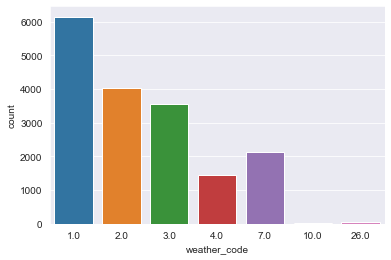

In [22]:
# weather_code
sns.countplot(data=df, x="weather_code");

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [23]:
df["timestamp"] =df["timestamp"].astype("datetime64")

In [24]:
df.set_index("timestamp",inplace=True)

In [25]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0

cnt   t1   t2  ...  is_holiday  is_weekend  season
timestamp                           ...                                
2015-01-04 00:00:00  182  3.0  2.0  ...         0.0         1.0     3.0
2015-01-04 01:00:00  138  3.0  2.5  ...         0.0         1.0     3.0
2015-01-04 02:00:00  134  2.5  2.5  ...         0.0         1.0     3.0
2015-01-04 03:00:00   72  2.0  2.0  ...         0.0         1.0     3.0
2015-01-04 04:00:00   47  2.0  0.0  ...         0.0         1.0     3.0

[5 rows x 9 columns]

- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [33]:
df.index.year + df.index.month

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='timestamp', length=17414)

In [35]:
df['year_month'] = df.index.strftime('%Y-%m')

In [36]:
df["year"] = df.index.strftime('%Y')
df["month"] = df.index.strftime('%m')
df["day_of_month"] = df.index.strftime('%d')
df["day_of_week"] = df.index.strftime('%w')
df["hour"] = df.index.strftime("%H")

In [49]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season year_month  year month  \
timestamp                                                                    
2015-01-04 00:00:00         0.0         1.0     3.0    2015-01  2015    01   
2015-01-04 01:00:00         0.0         1.0     3.0    2015-01  2015    01   
2015-01-04 02:00:00         0.0         1.0     3.0    2015-01  2015    01   
2015-01-04 03:00:00         0.0         1.0     3.0    2015-01  2015    01   
2015-01-04 04:00:00         0.0         1.0     3.0    2015-01  2015    01   

                    day_of_month day_of_week hour  
timestamp                                          
2015-01-04 00:00:00           04           0   00  
2015-01-04 01:00:00           04           0   01  
2015-01-04 02:00:00           04           0   02  
2015-01-04 03:00:00           04           0   03  
2015-01-04 04:00:00           04           0   04

In [9]:
df.head()

cnt   t1   t2  ...  day_of_month  day_of_week  hour
timestamp                           ...                                 
2015-01-04 00:00:00  182  3.0  2.0  ...             4            6     0
2015-01-04 01:00:00  138  3.0  2.5  ...             4            6     1
2015-01-04 02:00:00  134  2.5  2.5  ...             4            6     2
2015-01-04 03:00:00   72  2.0  2.0  ...             4            6     3
2015-01-04 04:00:00   47  2.0  0.0  ...             4            6     4

[5 rows x 15 columns]

### 7.Visualize the correlation with a heatmap

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  object 
 11  month         17414 non-null  object 
 12  day_of_month  17414 non-null  object 
 13  day_of_week   17414 non-null  object 
 14  hour          17414 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory usage: 2.8+ MB


In [54]:
df[["year","month","day_of_month","day_of_week","hour"]] = df[["year","month","day_of_month","day_of_week","hour"]].astype("int64")

In [55]:
df.corr()

cnt        t1        t2       hum  wind_speed  \
cnt           1.000000  0.388798  0.369035 -0.462901    0.116295   
t1            0.388798  1.000000  0.988344 -0.447781    0.145471   
t2            0.369035  0.988344  1.000000 -0.403495    0.088409   
hum          -0.462901 -0.447781 -0.403495  1.000000   -0.287789   
wind_speed    0.116295  0.145471  0.088409 -0.287789    1.000000   
weather_code -0.166633 -0.097114 -0.098385  0.334750    0.124803   
is_holiday   -0.051698 -0.042233 -0.040051  0.032068   -0.002606   
is_weekend   -0.096499 -0.005342 -0.008510  0.028098    0.011479   
season       -0.116180 -0.285851 -0.285900  0.290381    0.010305   
year          0.010046 -0.037959 -0.044972  0.072443   -0.094739   
month         0.063757  0.332712  0.368366  0.113149   -0.086383   
day_of_month -0.017887  0.005072  0.006791 -0.020868    0.002040   
day_of_week   0.016346  0.015012  0.009086 -0.020470    0.017602   
hour          0.324423  0.168708  0.153956 -0.295653    0.141792   

              weather_code  is_holiday  is_weekend    season      year  \
cnt              -0.166633   -0.051698   -0.096499 -0.116180  0.010046   
t1               -0.097114   -0.042233   -0.005342 -0.285851 -0.037959   
t2               -0.098385   -0.040051   -0.008510 -0.285900 -0.044972   
hum               0.334750    0.032068    0.028098  0.290381  0.072443   
wind_speed        0.124803   -0.002606    0.011479  0.010305 -0.094739   
weather_code      1.000000    0.012939    0.042362  0.098976 -0.009234   
is_holiday        0.012939    1.000000   -0.094898 -0.032488  0.034631   
is_weekend        0.042362   -0.094898    1.000000  0.001067  0.003049   
season            0.098976   -0.032488    0.001067  1.000000  0.024400   
year             -0.009234    0.034631    0.003049  0.024400  1.000000   
month            -0.033253   -0.011511   -0.005406  0.203249 -0.026547   
day_of_month      0.001904    0.042657    0.005721 -0.006460 -0.021935   
day_of_week      -0.017171   -0.069365   -0.003113  0.002659 -0.007213   
hour             -0.041786   -0.000288    0.001803  0.000006  0.000542   

                 month  day_of_month  day_of_week      hour  
cnt           0.063757     -0.017887     0.016346  0.324423  
t1            0.332712      0.005072     0.015012  0.168708  
t2            0.368366      0.006791     0.009086  0.153956  
hum           0.113149     -0.020868    -0.020470 -0.295653  
wind_speed   -0.086383      0.002040     0.017602  0.141792  
weather_code -0.033253      0.001904    -0.017171 -0.041786  
is_holiday   -0.011511      0.042657    -0.069365 -0.000288  
is_weekend   -0.005406      0.005721    -0.003113  0.001803  
season        0.203249     -0.006460     0.002659  0.000006  
year         -0.026547     -0.021935    -0.007213  0.000542  
month         1.000000      0.012614     0.009472 -0.000312  
day_of_month  0.012614      1.000000     0.022060 -0.000310  
day_of_week   0.009472      0.022060     1.000000  0.001453  
hour         -0.000312     -0.000310     0.001453  1.000000

<AxesSubplot:>

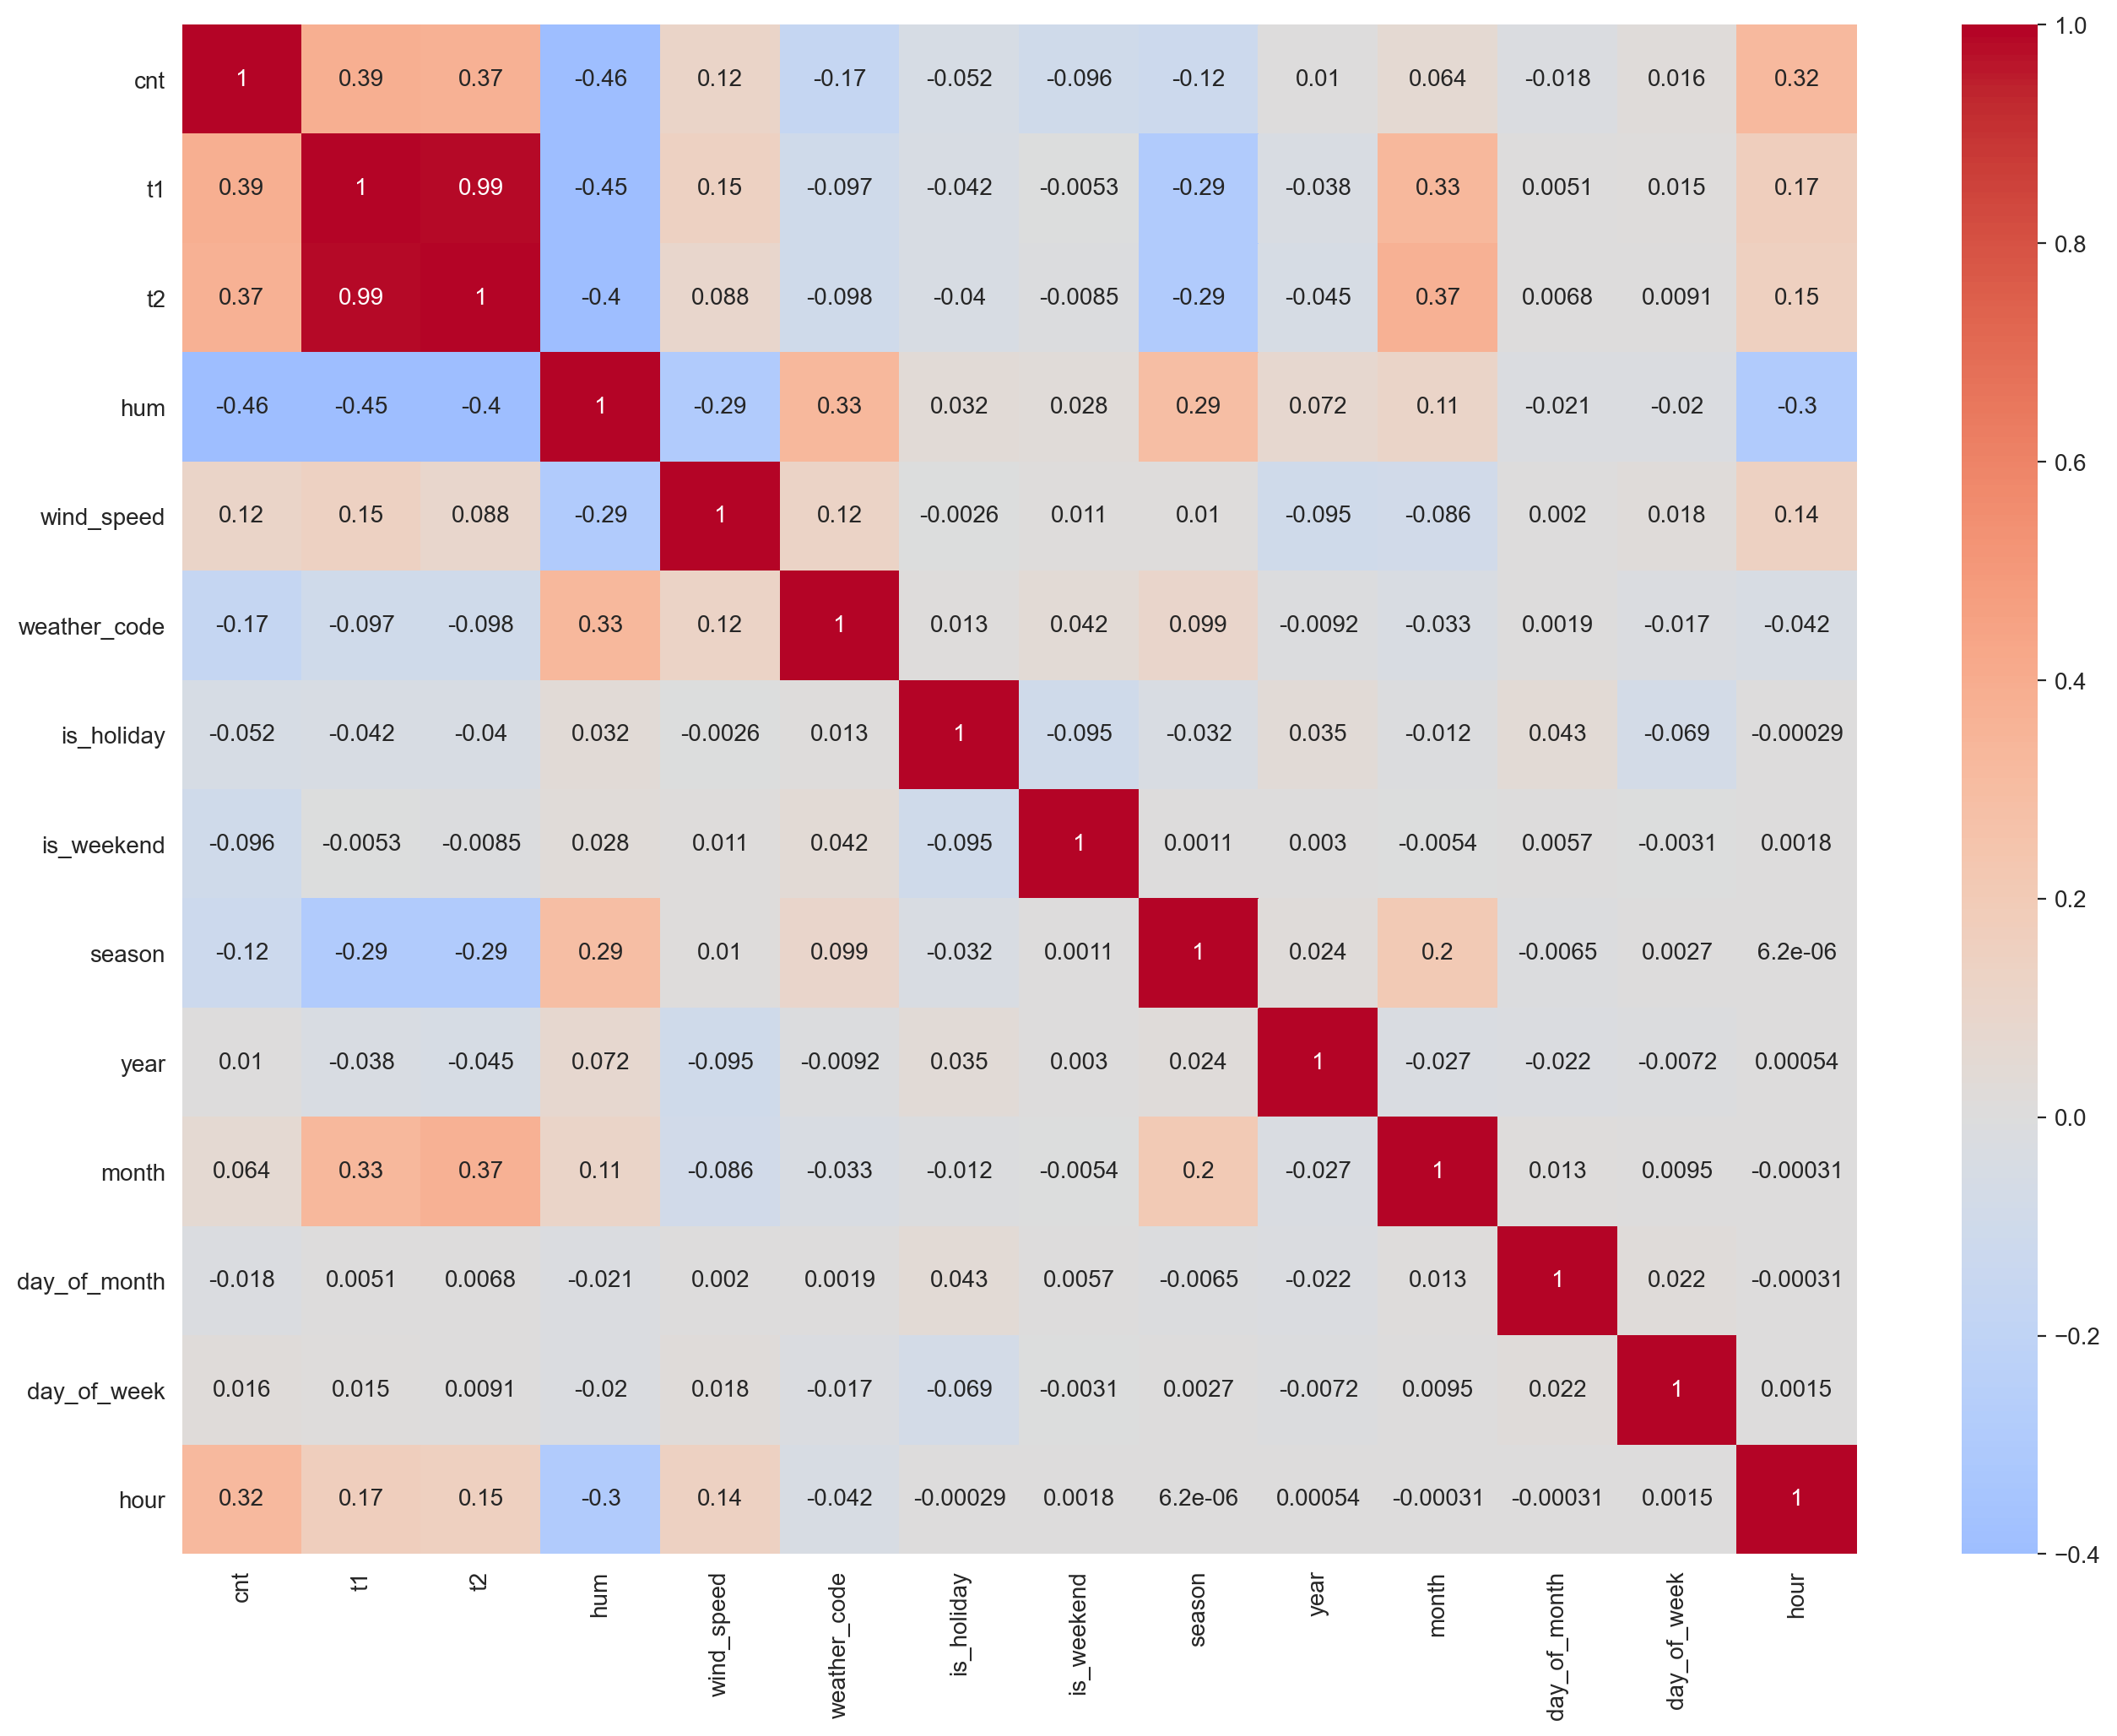

In [87]:
plt.figure(figsize=(16,12),dpi=200)
sns.heatmap(df.corr(),annot=True,center=0,vmin = -0.4, vmax = 1, cmap = "coolwarm")

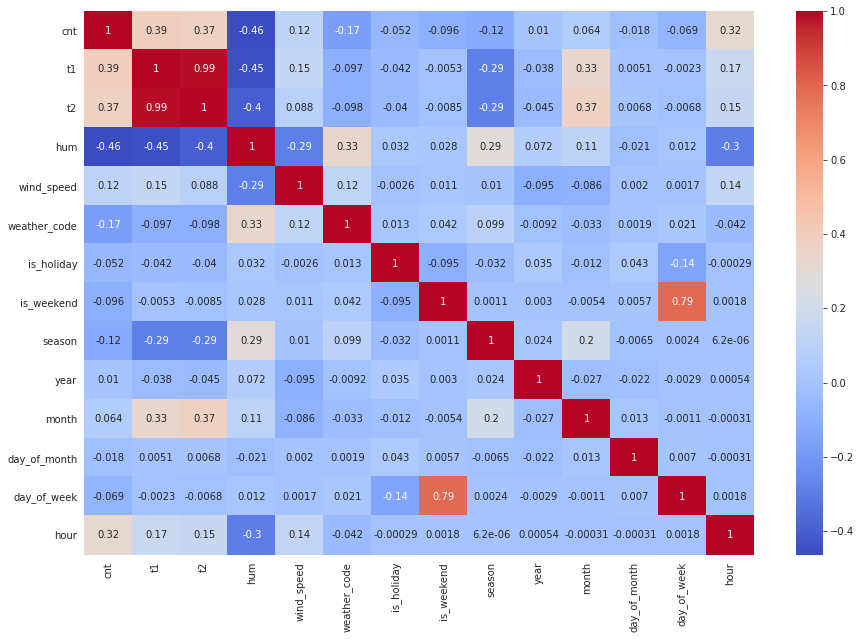

In [ ]:
# for all variables 


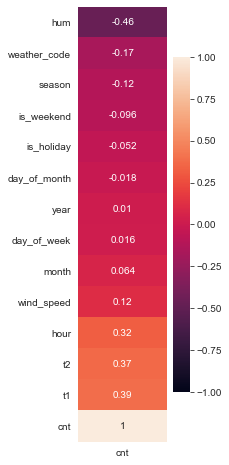

In [202]:
fig, ax = plt.subplots(figsize=(2,8))
sns.heatmap(df.corr()[["cnt"]].sort_values("cnt"),
 vmax=1, vmin=-1, annot=True, ax=ax);

In [203]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

In [ ]:
df.plot()

<AxesSubplot:>

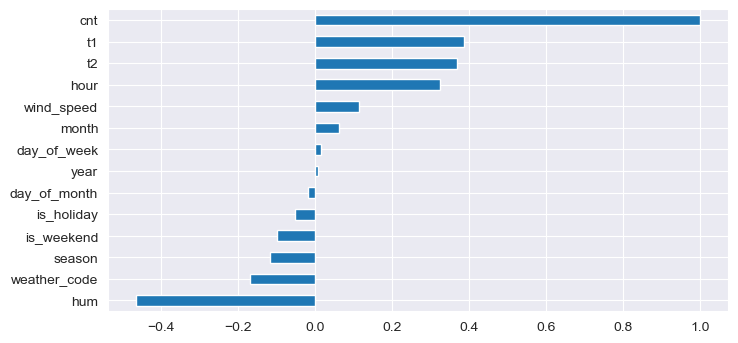

In [115]:
fig,ax = plt.subplots(figsize=(8,4),dpi=100)
df.corr()["cnt"].sort_values().plot(kind="barh",ax=ax)

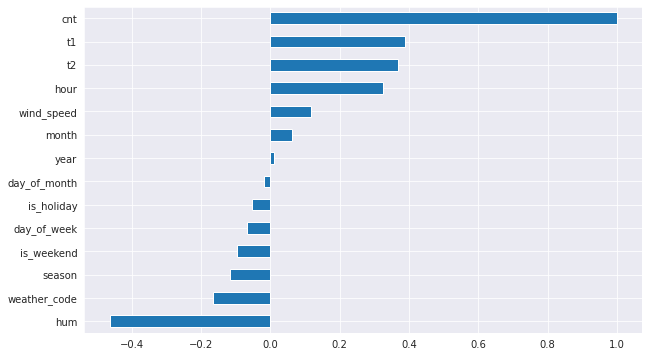

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

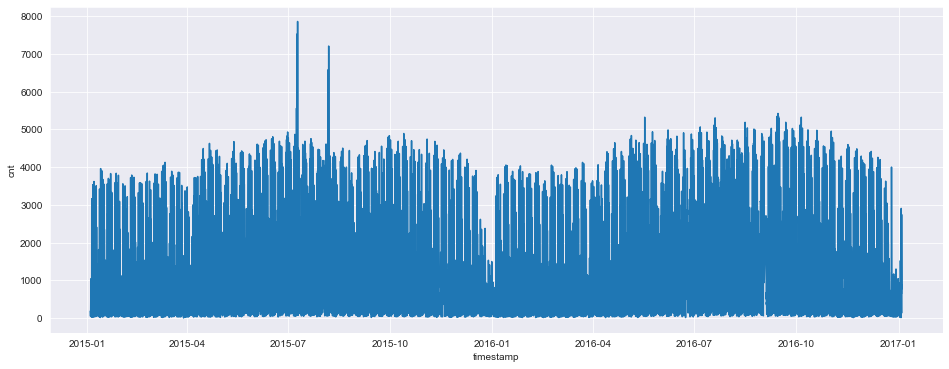

In [129]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=df,x=df.index,y="cnt",ax=ax)

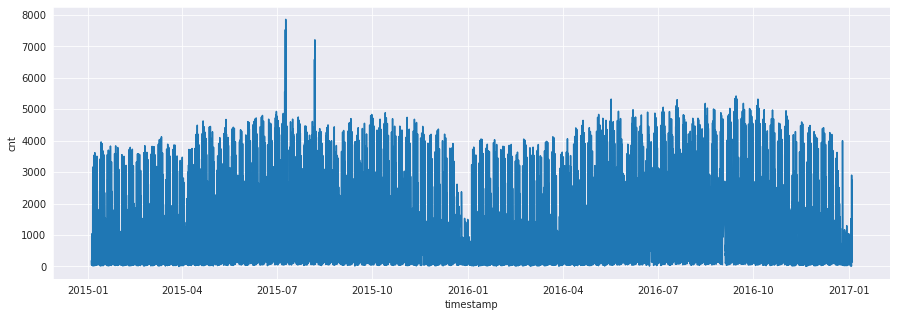

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

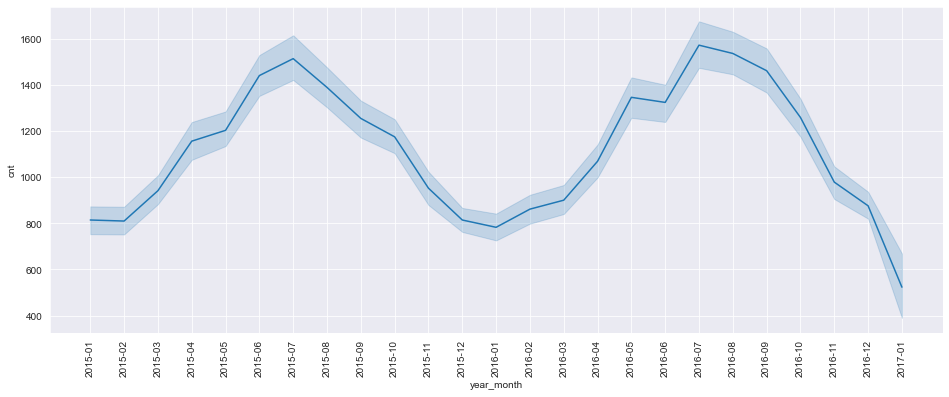

In [142]:
fig,ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=df,x="year_month",y="cnt")
plt.xticks(rotation=90);
#y scale degistiremedim.

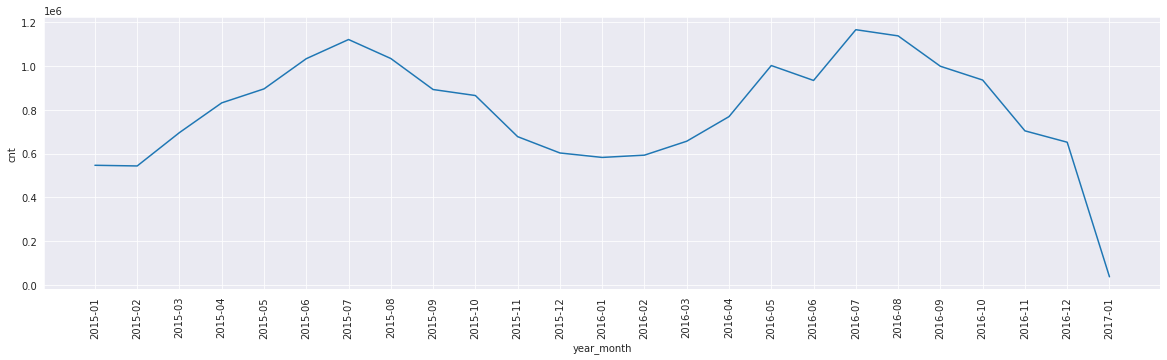

In [ ]:
# with lineplot


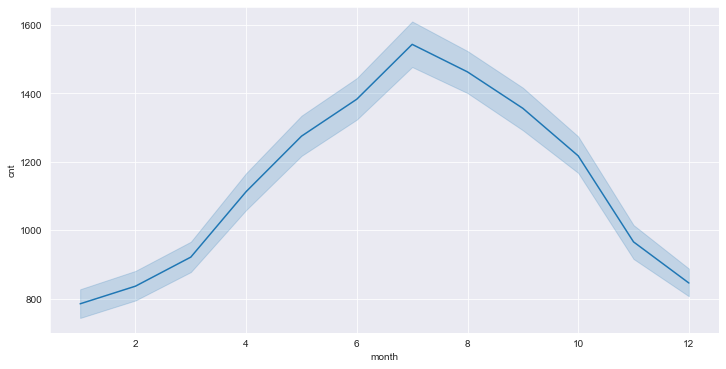

In [145]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=df,x="month",y="cnt");

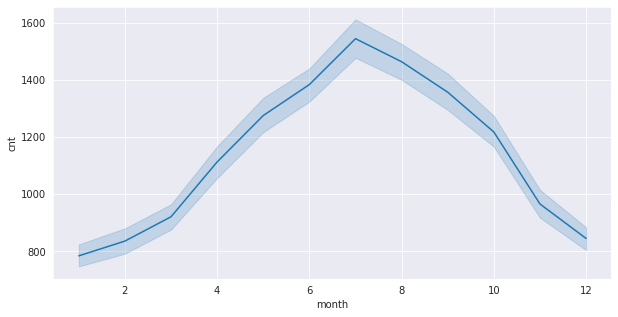

In [ ]:
# with lineplot


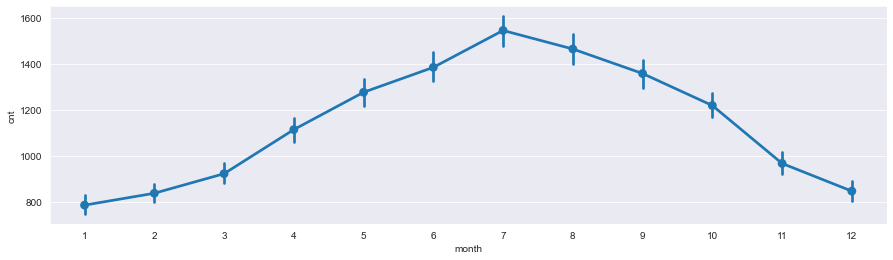

In [150]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df, x="month", y="cnt");

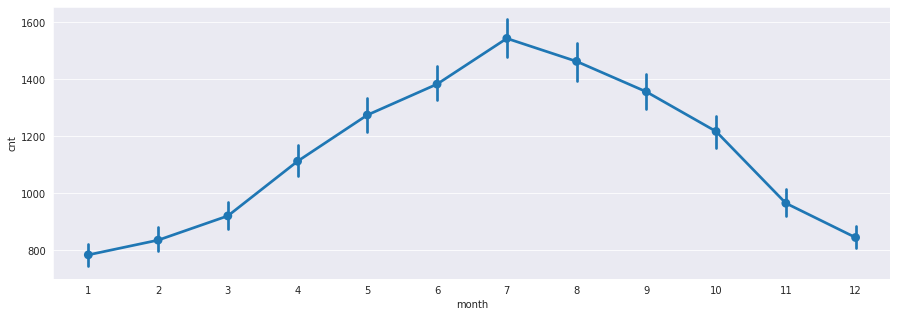

In [ ]:
# with pointplot


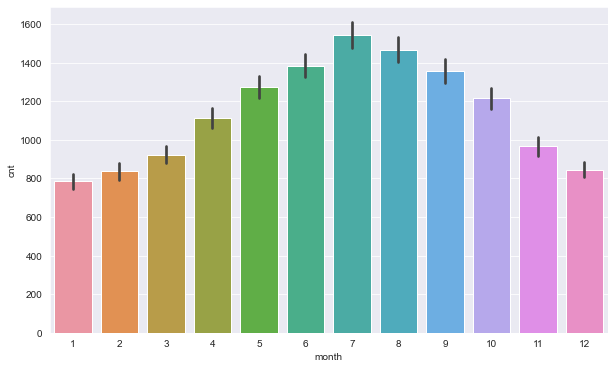

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="month", y="cnt");

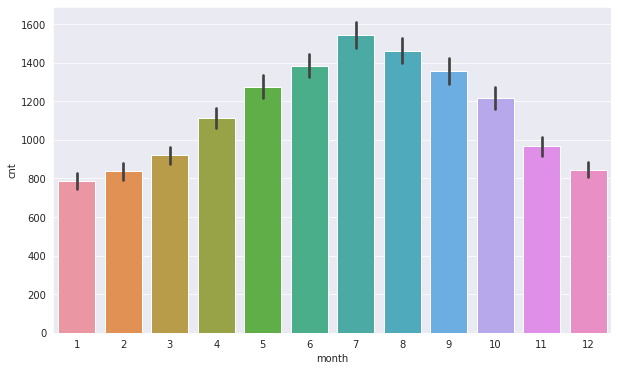

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

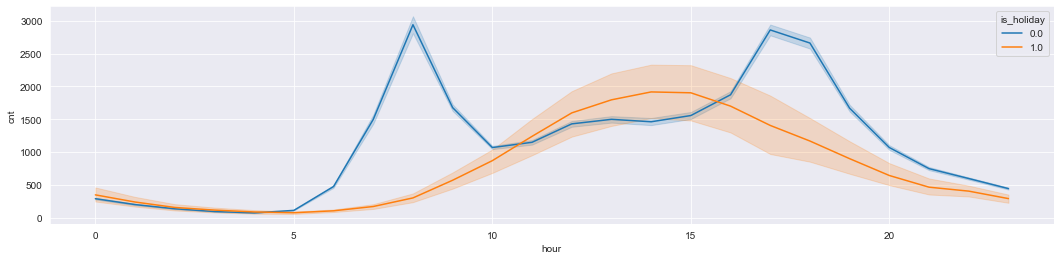

In [162]:
fig,ax = plt.subplots(figsize=(18,4))
sns.lineplot(data=df,x="hour", y="cnt",hue="is_holiday");

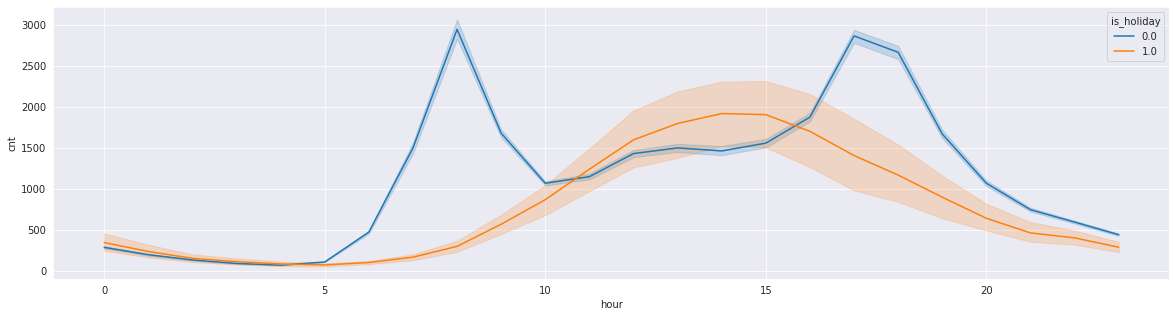

In [ ]:
# with lineplot (*whether it is a holiday or not*)


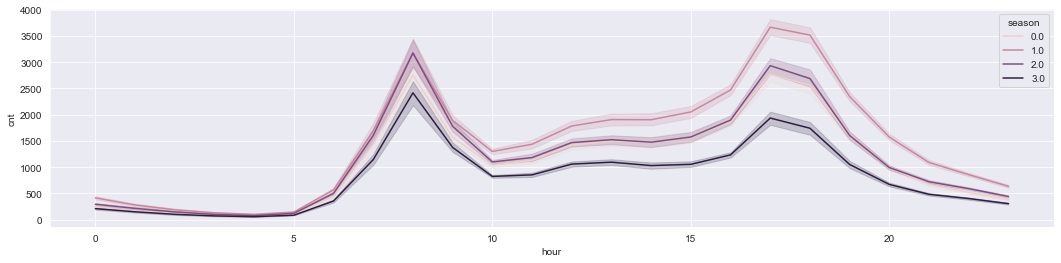

In [163]:
fig,ax = plt.subplots(figsize=(18,4))
sns.lineplot(data=df,x="hour",y="cnt",hue="season");


<AxesSubplot:xlabel='hour', ylabel='cnt'>

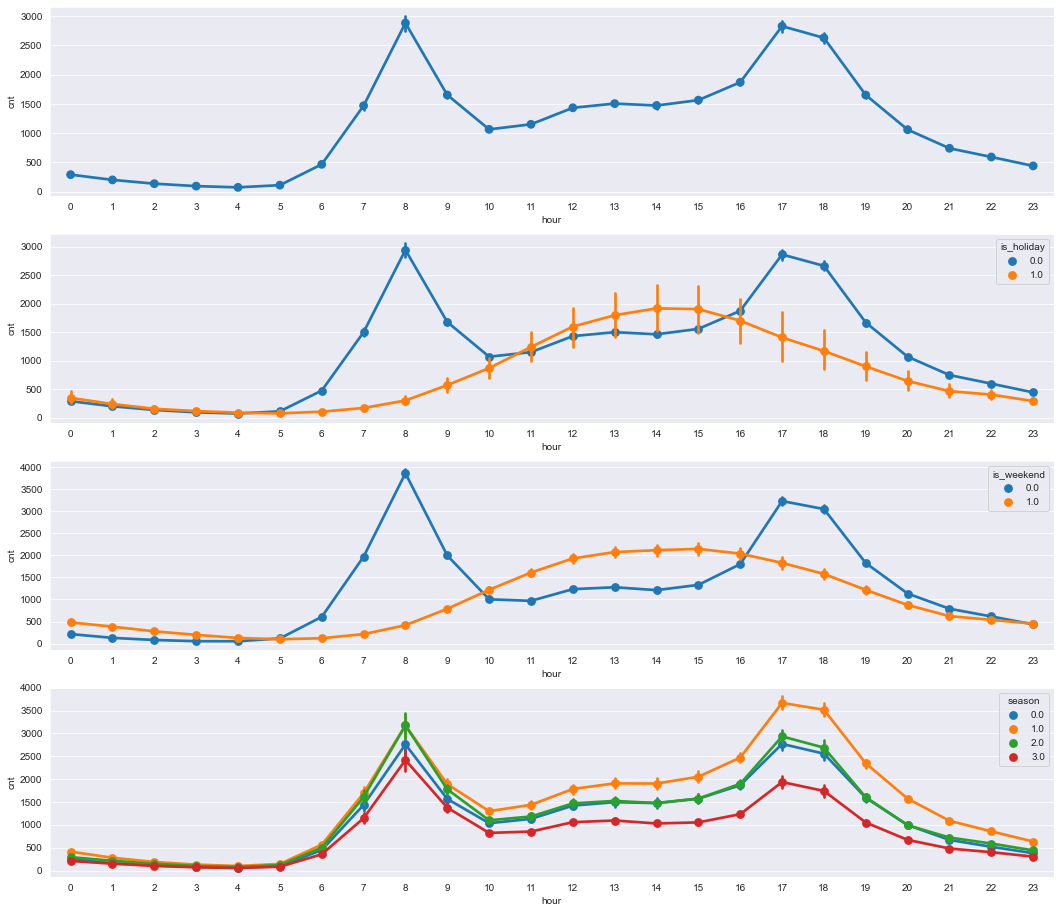

In [167]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(18,16))
sns.pointplot(data=df,x="hour",y="cnt",ax=ax[0])
sns.pointplot(data=df,x="hour",y="cnt",hue="is_holiday",ax=ax[1])
sns.pointplot(data=df,x="hour",y="cnt",hue="is_weekend",ax=ax[2])
sns.pointplot(data=df,x="hour",y="cnt",hue="season",ax=ax[3])


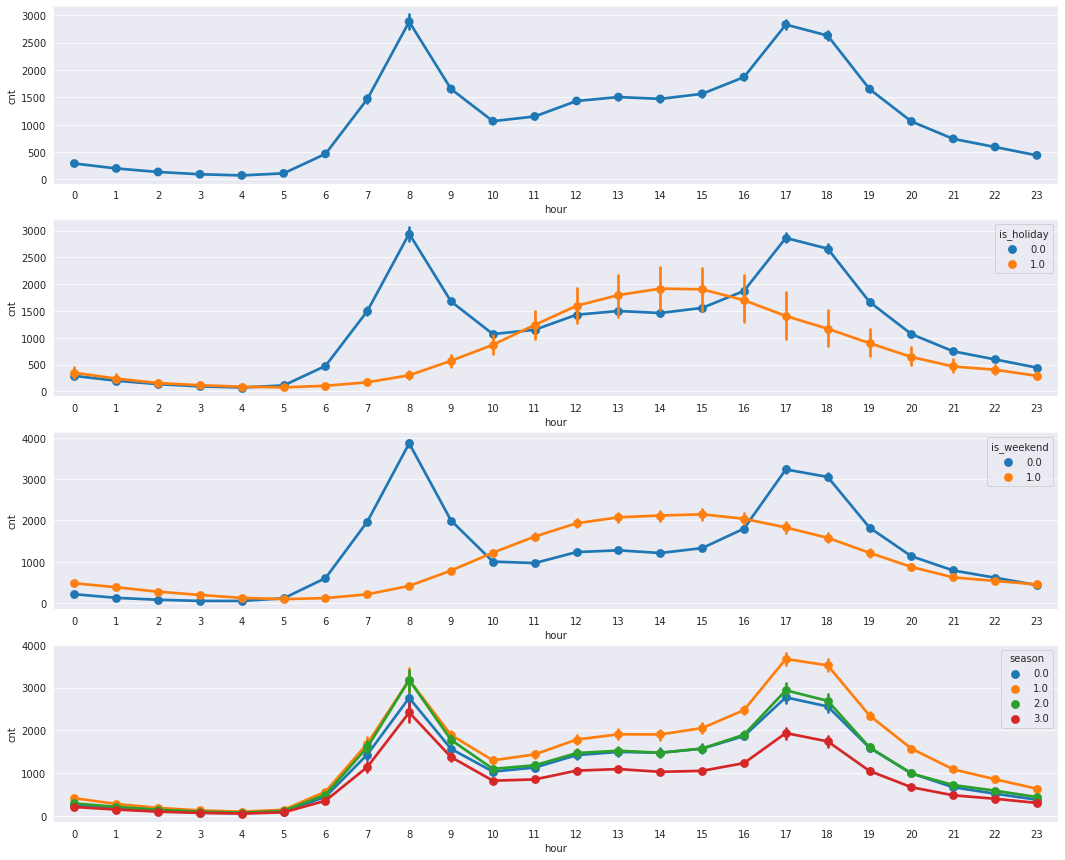

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

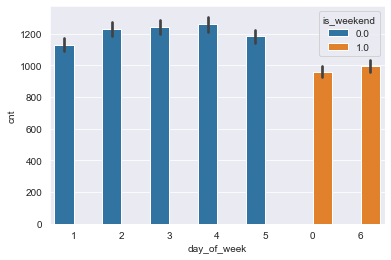

In [178]:
hue_order = [1,2,3,4,5,0,6]
sns.barplot(data=df, x="day_of_week", y="cnt",hue="is_weekend", order=hue_order)

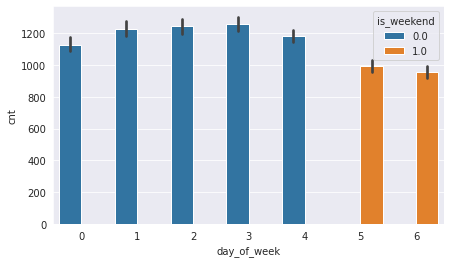

In [ ]:
# with barplot


<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

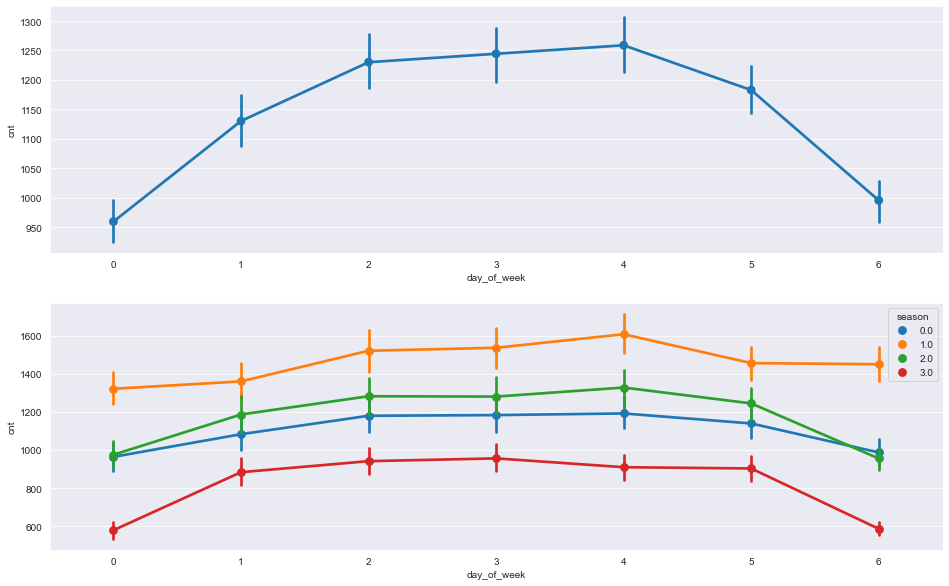

In [188]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(16,10))
sns.pointplot(data=df, x="day_of_week",y="cnt",ax=ax[0])
sns.pointplot(data=df, x="day_of_week",y="cnt",ax=ax[1],hue="season")
#verilen veriyle farkili sonuc 

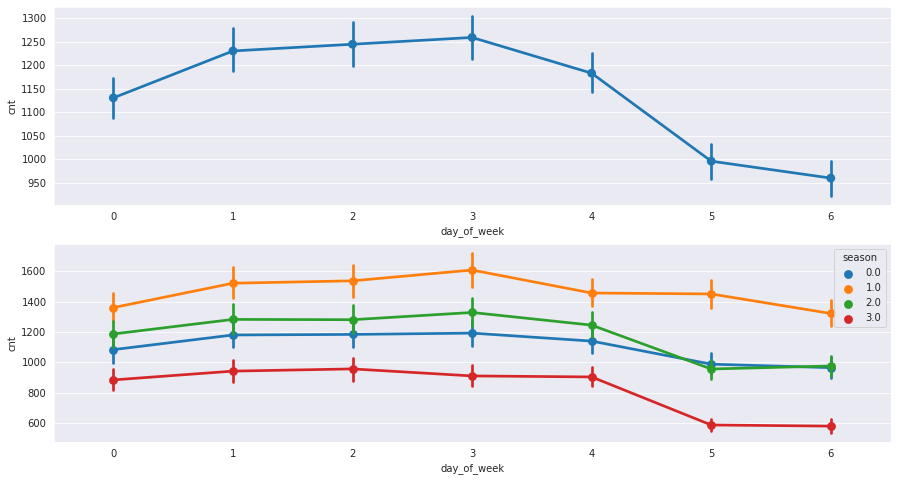

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

In [239]:
dayseries = df.groupby("day_of_month")["cnt"].mean().astype("int64")

In [246]:
dayframe.index

Index(['cnt'], dtype='object')

In [251]:
dayframe=dayseries.to_frame()
dayframe

cnt
day_of_month      
1             1077
2             1088
3             1127
4             1144
5             1140
6             1211
7             1194
8             1222
9             1261
10            1157
11            1203
12            1166
13            1139
14            1123
15            1175
16            1140
17            1182
18            1178
19            1153
20            1115
21            1125
22            1127
23            1173
24            1054
25            1190
26            1081
27            1130
28            1062
29            1079
30            1156
31             968

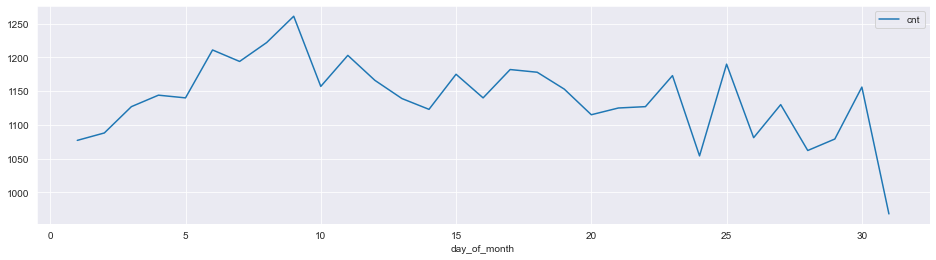

In [259]:
dayframe.plot.line(figsize=(16,4));


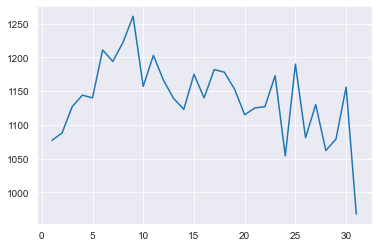

In [266]:
plt.plot(dayframe)

In [262]:
dayframeT=dayseries.to_frame().T
dayframeT

day_of_month    1     2     3     4     5     6     7     8     9     10  ...  \
cnt           1077  1088  1127  1144  1140  1211  1194  1222  1261  1157  ...   

day_of_month    22    23    24    25    26    27    28    29    30   31  
cnt           1127  1173  1054  1190  1081  1130  1062  1079  1156  968  

[1 rows x 31 columns]

<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

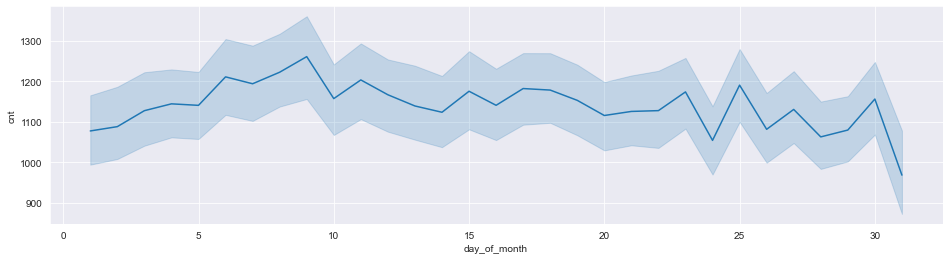

In [269]:
fig,ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=df,x="day_of_month",y="cnt",ax=ax)

day_of_month    1     2     3     4     5   ...    27    28    29    30   31
cnt           1077  1088  1128  1144  1141  ...  1131  1063  1080  1156  968

[1 rows x 31 columns]

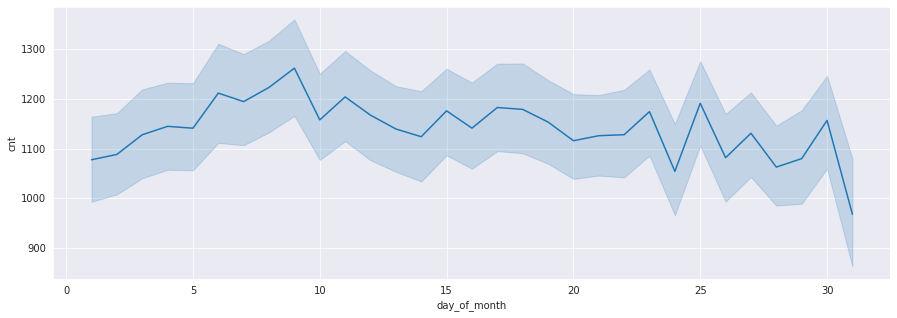

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

In [270]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season year_month  year  month  \
timestamp                                                                     
2015-01-04 00:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0    2015-01  2015      1   

                     day_of_month  day_of_week  hour  
timestamp                                             
2015-01-04 00:00:00             4            0     0  
2015-01-04 01:00:00             4            0     1  
2015-01-04 02:00:00             4            0     2  
2015-01-04 03:00:00             4            0     3  
2015-01-04 04:00:00             4            0     4

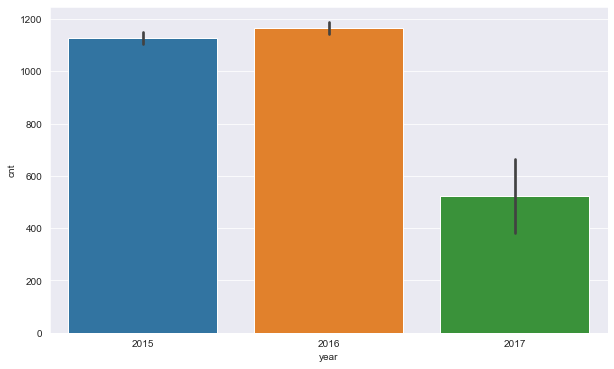

In [275]:
# with barplot
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df,x="year",y="cnt",ax=ax);

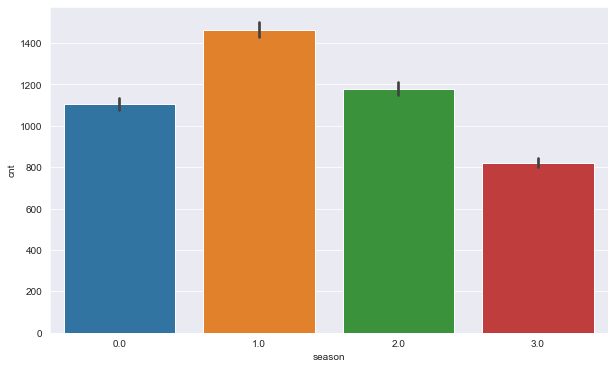

In [276]:
# with barplot
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df,x="season",y="cnt",ax=ax);

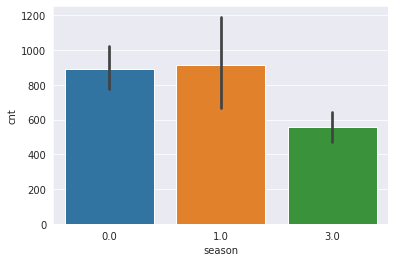

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [277]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

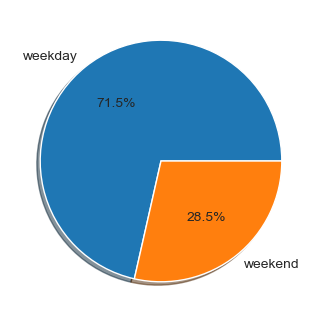

In [284]:
fig, ax = plt.subplots(dpi=100)
labelss=["weekday","weekend"]
ax.pie(data=df,x=df.is_weekend.value_counts(),autopct='%1.1f%%', shadow=True,labels=labelss);

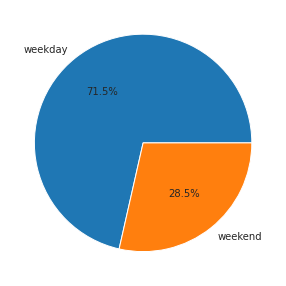

In [ ]:
# pie chart

<AxesSubplot:xlabel='is_weekend', ylabel='count'>

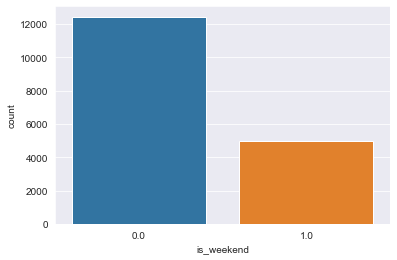

In [286]:
sns.countplot(data=df,x="is_weekend")

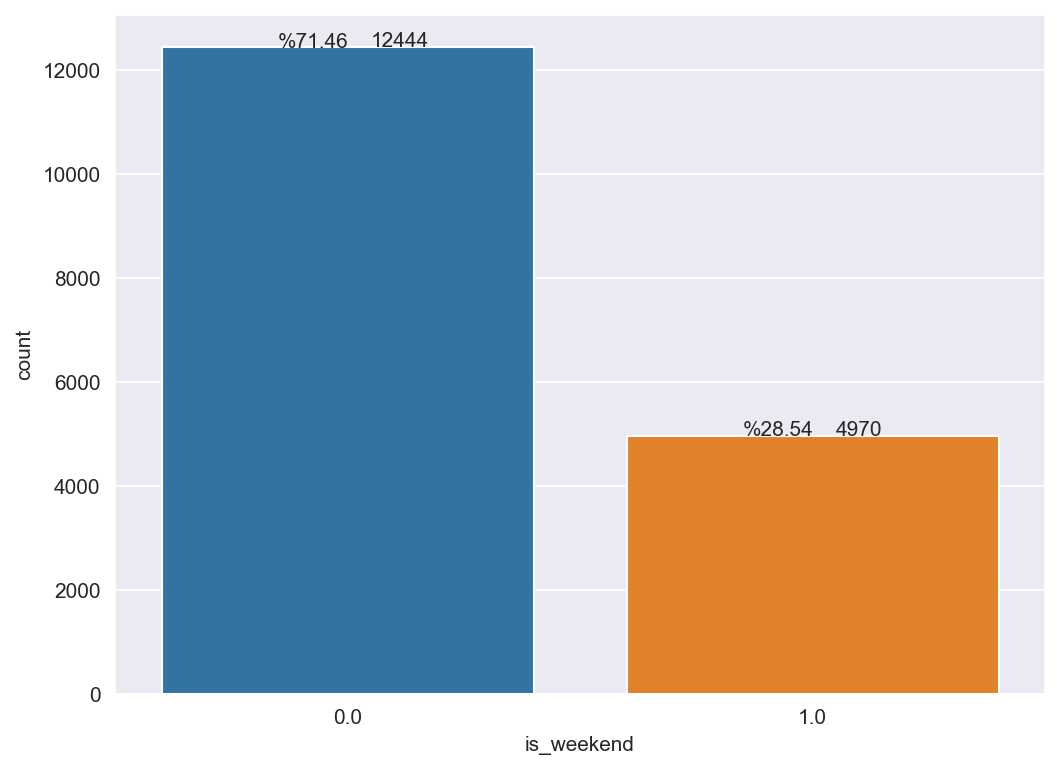

In [369]:
# with countplot
fig,ax = plt.subplots(figsize=(8,6),dpi=150)
sns.countplot(data=df,x="is_weekend",ax=ax)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()-5));

### 16.Plot the distribution of weather code by seasons

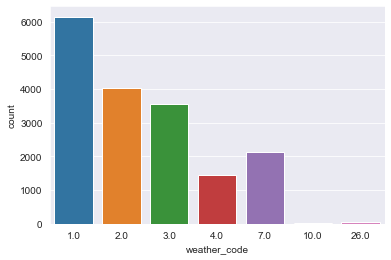

In [303]:
sns.countplot(data=df,x="weather_code");

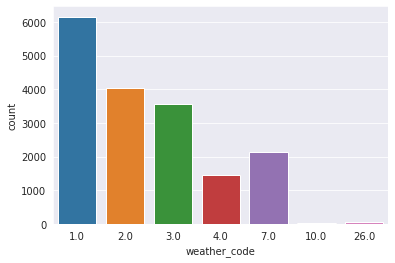

In [ ]:
# with countplot


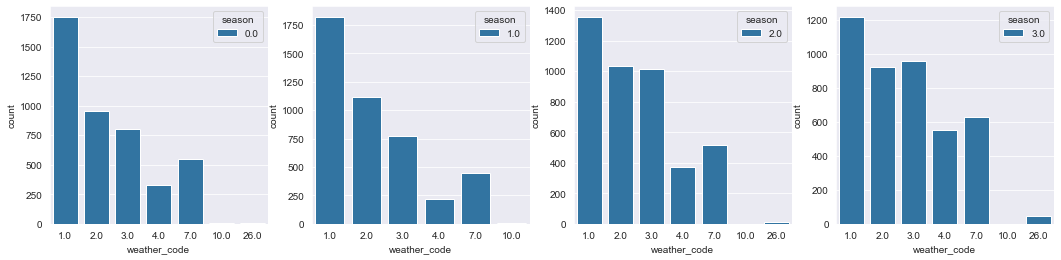

In [311]:
fig,ax= plt.subplots(nrows=1,ncols=4,figsize=(18,4))
for i in range(4):
    sns.countplot(data=df[df["season"]==i],x="weather_code",hue="season",ax=ax[i])

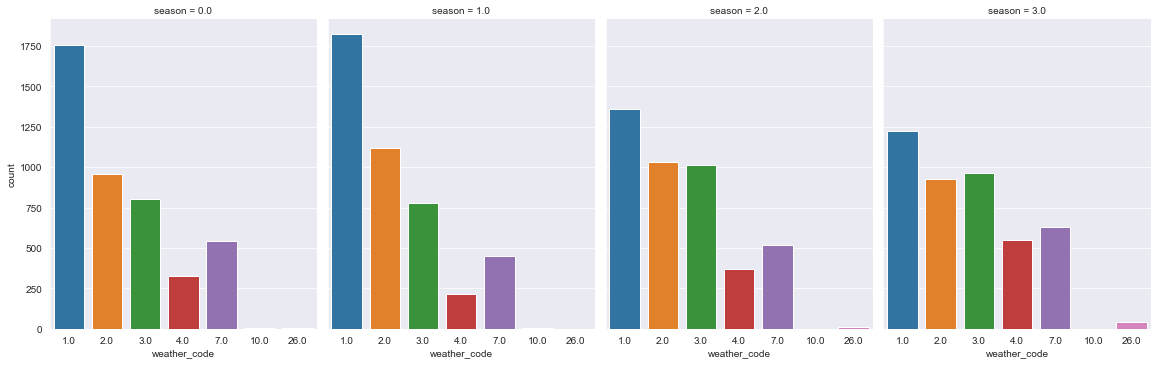

In [333]:
sns.catplot(data=df,x="weather_code",kind="count",col="season",col_wrap=4,  height=5, aspect=0.8);

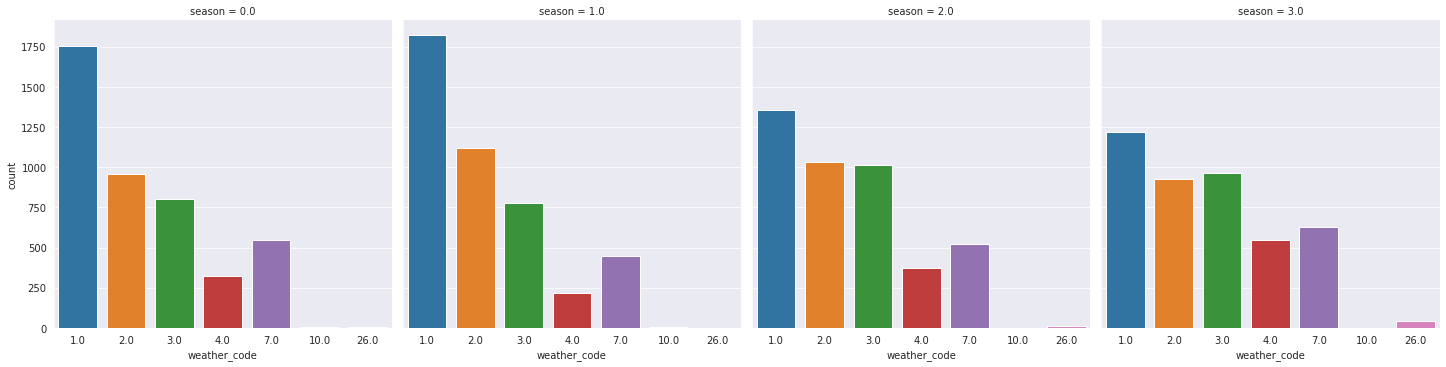

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

In [334]:
df.head()

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season year_month  year  month  \
timestamp                                                                     
2015-01-04 00:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 03:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 04:00:00         0.0         1.0     3.0    2015-01  2015      1   

                     day_of_month  day_of_week  hour  
timestamp                                             
2015-01-04 00:00:00             4            0     0  
2015-01-04 01:00:00             4            0     1  
2015-01-04 02:00:00             4            0     2  
2015-01-04 03:00:00             4            0     3  
2015-01-04 04:00:00             4            0     4

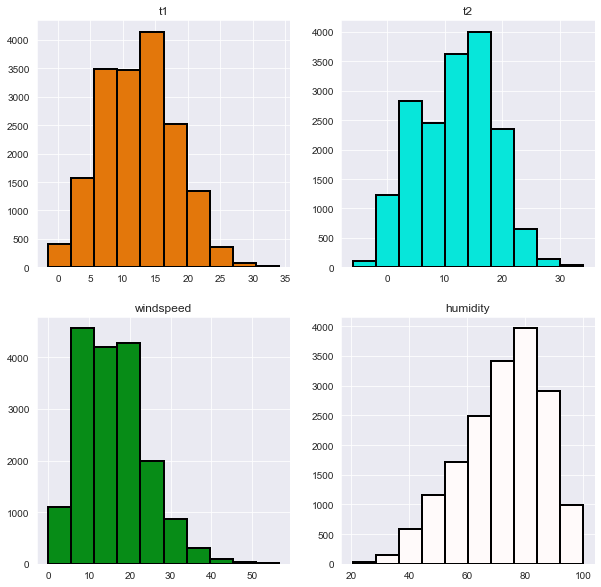

In [387]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(data=df,x="t1",color="#E3770B",linewidth=2,edgecolor="black")
plt.title("t1")
plt.subplot(2,2,2)
plt.hist(data=df,x="t2",color="#07E6DA",linewidth=2,edgecolor="black")
plt.title("t2")
plt.subplot(2,2,3)
plt.hist(data=df,x="wind_speed", color="#078C17",linewidth=2,edgecolor="black")
plt.title("windspeed")
plt.subplot(2,2,4)
plt.hist(data=df,x="hum",color="#FFFAFA",linewidth=2,edgecolor="black")
plt.title("humidity");

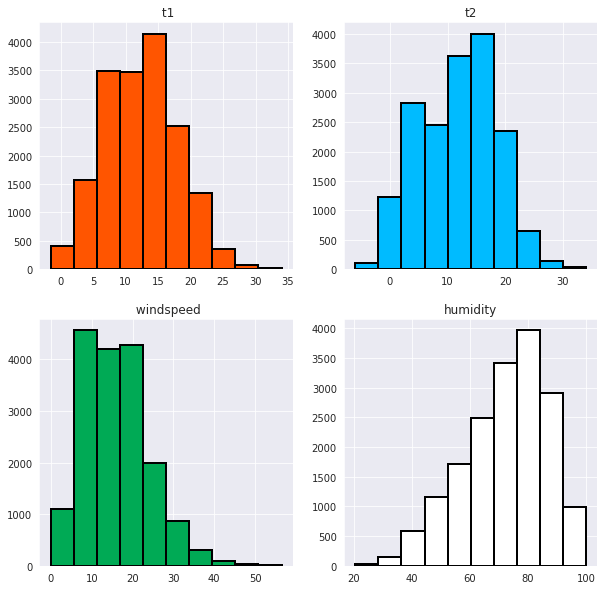

In [ ]:
# matplotlip hist


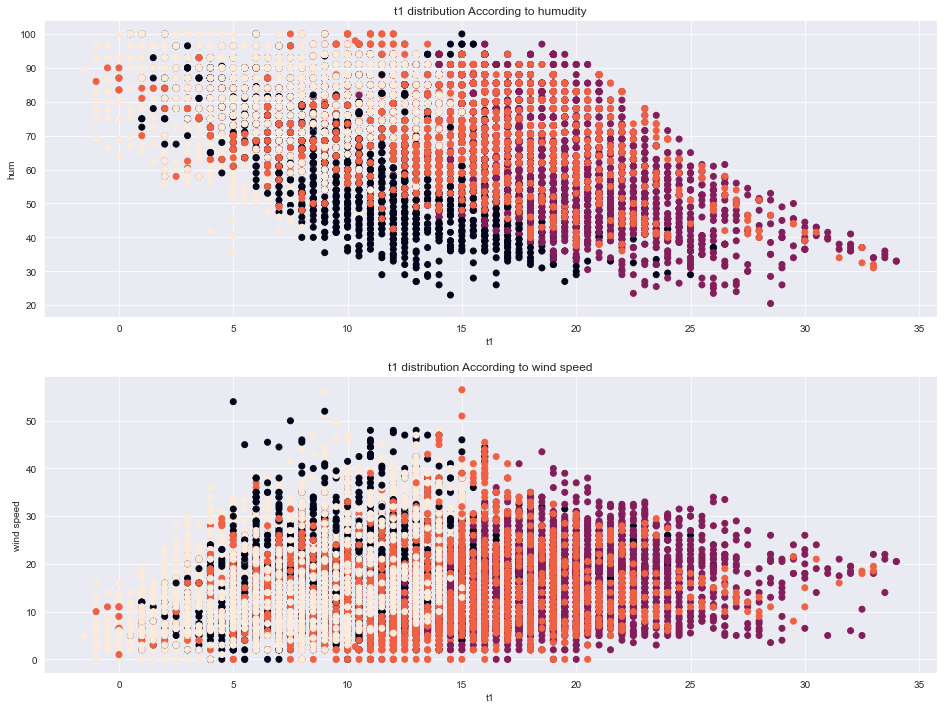

In [356]:
fig,ax = plt.subplots(2,1,figsize=(16,12))
ax[0].scatter(x=df.t1,y=df.hum,c=df.season)
ax[0].set_title("t1 distribution According to humudity")
ax[0].set_xlabel("t1")
ax[0].set_ylabel("hum")


ax[1].scatter(x=df.t1,y=df.wind_speed,c=df.season)
plt.xlabel("t1")
plt.ylabel("wind speed")
plt.title("t1 distribution According to wind speed")
plt.show()


<AxesSubplot:xlabel='t1', ylabel='wind_speed'>

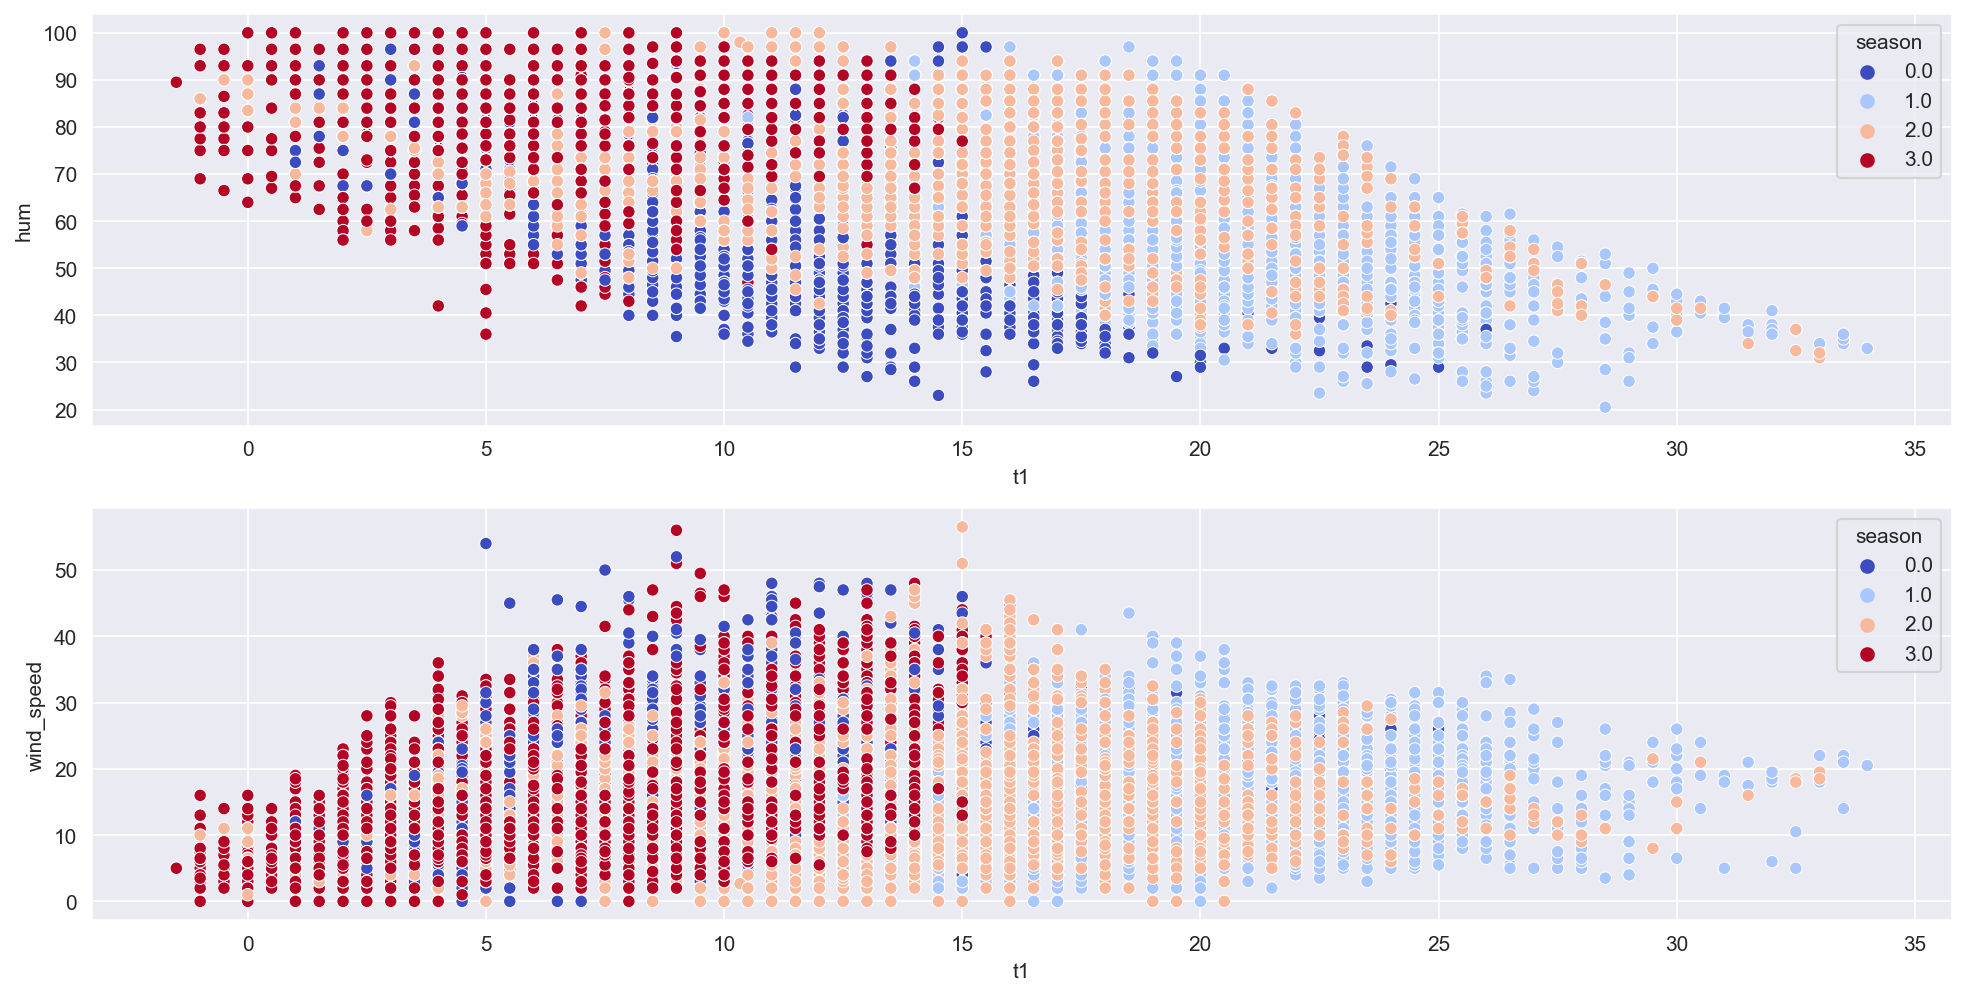

In [366]:
fig,ax = plt.subplots(2,1,figsize = (16,8),dpi=150)
sns.scatterplot(data=df,x="t1",y="hum",hue="season",ax=ax[0], palette="coolwarm")
sns.scatterplot(data=df,x="t1",y="wind_speed",hue="season",ax=ax[1], palette="coolwarm")

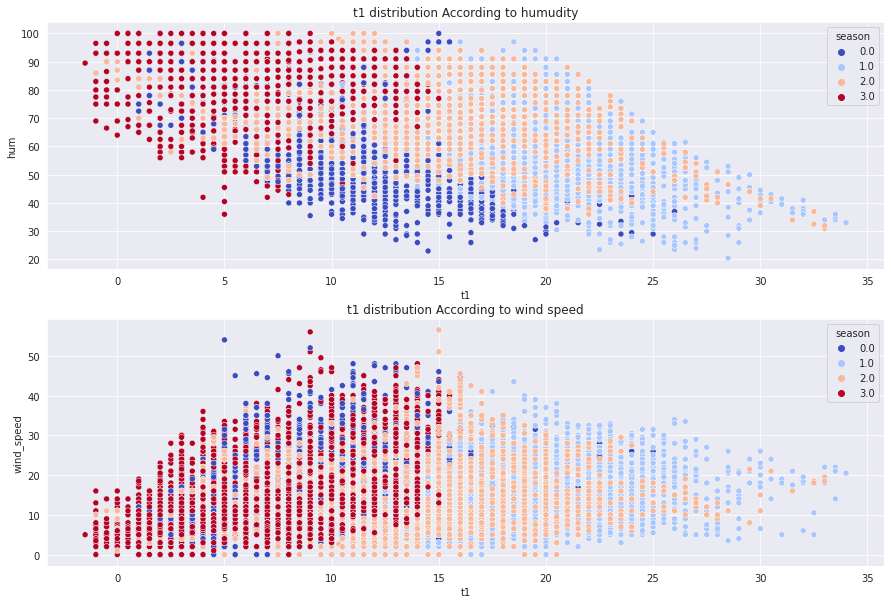

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___